# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 13.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [ ]:
df_pct_poverty.poverty_rate.unique()
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

In [ ]:
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

In [ ]:
df_data = pd.DataFrame(df_fatalities)
df_data['Geo'] = df_hh_income['Geographic Area']
df_data['New_city'] = df_hh_income['City']
df_data['Median_income'] = df_hh_income['Median Income']
df_data['High_school_pr'] = df_pct_completed_hs['percent_completed_hs']
df_data['Povetry'] = df_pct_poverty['poverty_rate']
df_data['Share_white'] = df_share_race_city['share_white']
df_data['share_black'] = df_share_race_city['share_black']
df_data['share_native_american'] = df_share_race_city['share_native_american']
df_data['share_asian'] = df_share_race_city['share_asian']
df_data['share_hispanic'] = df_share_race_city['share_hispanic']

df_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,Geo,New_city,Median_income,High_school_pr,Povetry,Share_white,share_black,share_native_american,share_asian,share_hispanic
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,...,AL,Abanda CDP,11207,21.20,78.80,67.2,30.2,0,0,1.6
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,...,AL,Abbeville city,25615,69.10,29.10,54.4,41.4,0.1,1,3.1
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,...,AL,Adamsville city,42575,78.90,25.50,52.3,44.9,0.5,0.3,2.3
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,...,AL,Addison town,37083,81.40,30.70,99.1,0.1,0,0.1,0.4
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,...,AL,Akron town,21667,68.60,42.00,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,...,CA,Hollister city,69157,72.60,11.30,49.8,0,5.5,5.5,50.6
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,NaN,Albuquerque,NM,...,CA,Holtville city,24974,57.10,37.30,68.9,0.5,5,1.3,34.8
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,...,CA,Home Garden CDP,32411,54.60,32.20,78.6,0,6,0,7.7
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,...,CA,Home Gardens CDP,53480,61.70,25.90,88,0,2.7,1.3,6.7


# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(2535, 24)

In [ ]:
df_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'Geo', 'New_city', 'Median_income',
       'High_school_pr', 'Povetry', 'Share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
df_data.isnull().values.any()

True

In [ ]:
df_data.isnull().sum().sum()

337

In [ ]:
df_data.info

<bound method DataFrame.info of         id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun 53.00   
1        4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4        9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun 31.00   
2531  2813               TK TK  28/07/17              shot     vehicle  0.00   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun 48.00   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle 28.00   
2534  2815        Dwayne Jeune  31/07/17              shot       knife 32.00   

     ge

In [ ]:
df_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,Geo,New_city,Median_income,High_school_pr,Povetry,Share_white,share_black,share_native_american,share_asian,share_hispanic
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,...,AL,Abanda CDP,11207,21.2,78.80,67.2,30.2,0,0,1.6
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,...,AL,Abbeville city,25615,69.1,29.10,54.4,41.4,0.1,1,3.1
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,...,AL,Adamsville city,42575,78.9,25.50,52.3,44.9,0.5,0.3,2.3
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,...,AL,Addison town,37083,81.4,30.70,99.1,0.1,0,0.1,0.4
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,...,AL,Akron town,21667,68.6,42.00,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,...,CA,Hollister city,69157,72.6,11.30,49.8,0,5.5,5.5,50.6
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,NaN,Albuquerque,NM,...,CA,Holtville city,24974,57.1,37.30,68.9,0.5,5,1.3,34.8
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,...,CA,Home Garden CDP,32411,54.6,32.20,78.6,0,6,0,7.7
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,...,CA,Home Gardens CDP,53480,61.7,25.90,88,0,2.7,1.3,6.7


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
list_nan = []
for i in df_data.columns:
   
  if df_data[i].isnull().values.any() == True:
    list_nan.append(i)
list_nan

['armed', 'race', 'flee', 'High_school_pr', 'Povetry']

In [ ]:
for i in list_nan:
  df_data[i] = df_data[i].fillna(0)
  

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

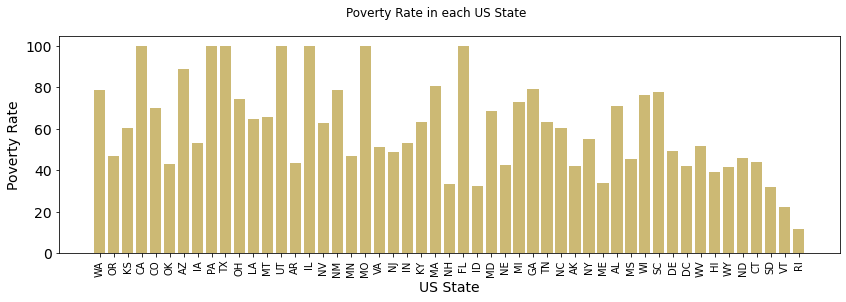

In [ ]:
poverty = df_data.groupby('Geo')['Povetry'].mean().sort_values(ascending=True)
poverty
# plt.style.use('seaborn-deep')

plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(df_data['state'], df_data['Povetry'])

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)


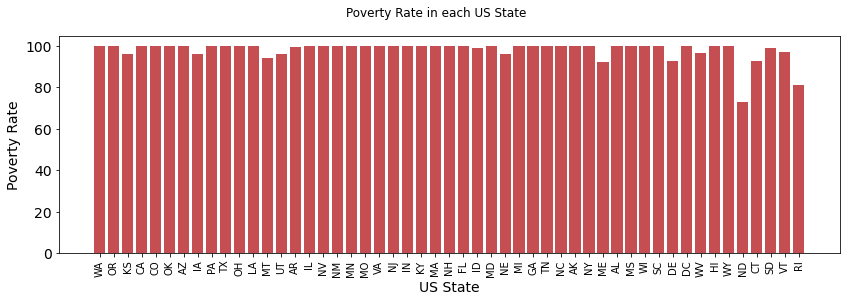

In [ ]:
plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(graduation)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(df_data['state'], df_data['High_school_pr'])
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
gradu = df_data.groupby('Geo')['High_school_pr'].mean()
gradu


Geo
AK   80.10
AL   80.16
AR   79.95
AZ   79.22
CA   81.62
Name: High_school_pr, dtype: float64

In [ ]:
poverty_r = df_data.groupby('Geo')['Povetry'].mean()
poverty_r


Geo
AK   18.68
AL   20.61
AR   22.96
AZ   25.27
CA   16.49
Name: Povetry, dtype: float64

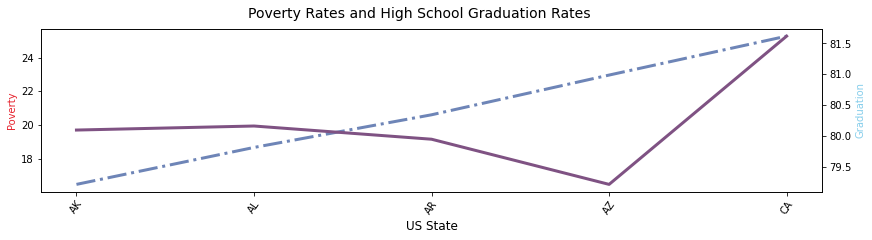

In [ ]:
plt.figure(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Poverty', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Graduation', color='skyblue') # or a named colour
 
ax1.plot(poverty.index, poverty, color='#6E85B7', linewidth=3, linestyle='-.')
ax2.plot(gradu.index, gradu, color='#7F5283', linewidth=3, marker='')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

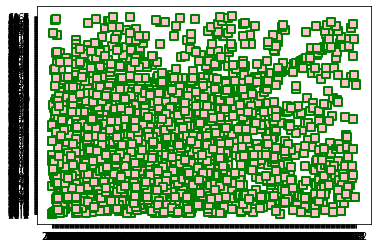

In [ ]:
plt.scatter(poverty,hsg, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')


In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'Geo', 'New_city', 'Median_income',
       'High_school_pr', 'Povetry', 'Share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


In [ ]:
killed = df_data.race.value_counts()
killed
df_fatalities.race.unique()


array(['A', 'W', 'H', 'B', 'O', 0, 'N'], dtype=object)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

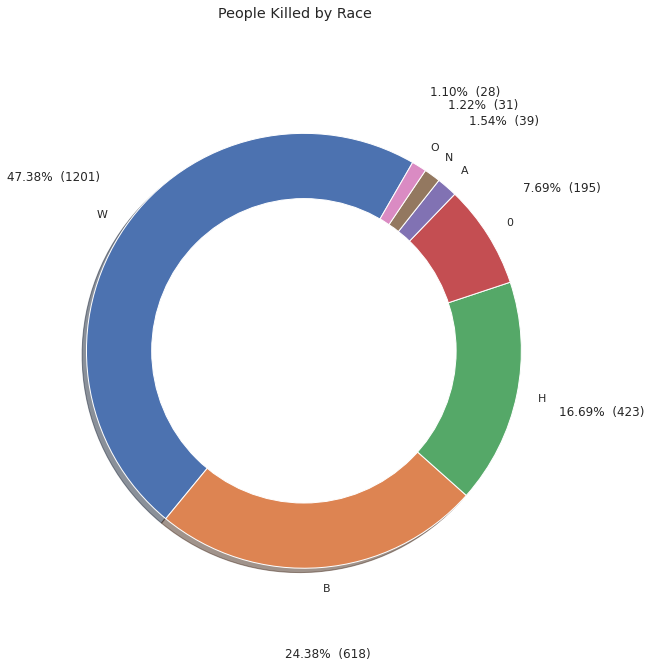

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,10))
plt.suptitle('People Killed by Race')
plt.pie(killed, labels=killed.index, autopct=make_autopct(killed), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
# plt.legend(loc='best')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [ ]:
killed_gender = df_fatalities.gender.value_counts()
killed_gender.F

107

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

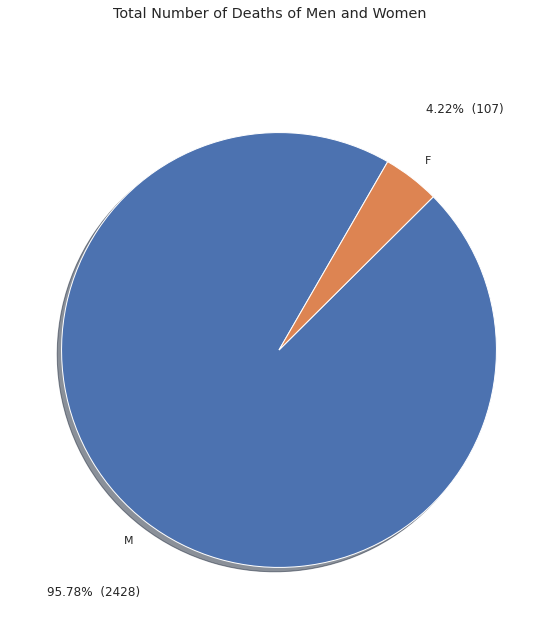

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Total Number of Deaths of Men and Women')
plt.pie(killed_gender, labels=killed_gender.index, autopct=make_autopct(killed_gender), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)


plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
df_data['age'] = df_data['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]
death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


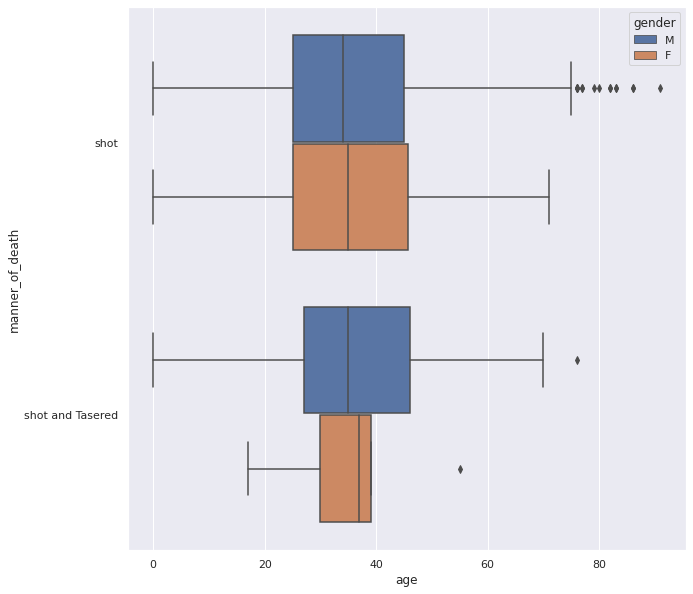

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age', y='manner_of_death', hue='gender', data=death_age)
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
df_data.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', 0,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and

In [ ]:
armed = df_fatalities.copy()

In [ ]:

weapons = ['gun', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen']
armed.armed = armed.armed.replace(weapons, 'armed')
armed.armed.unique()

array(['armed'], dtype=object)

In [ ]:
percentage = armed.armed.value_counts()
percentage

armed    2535
Name: armed, dtype: int64

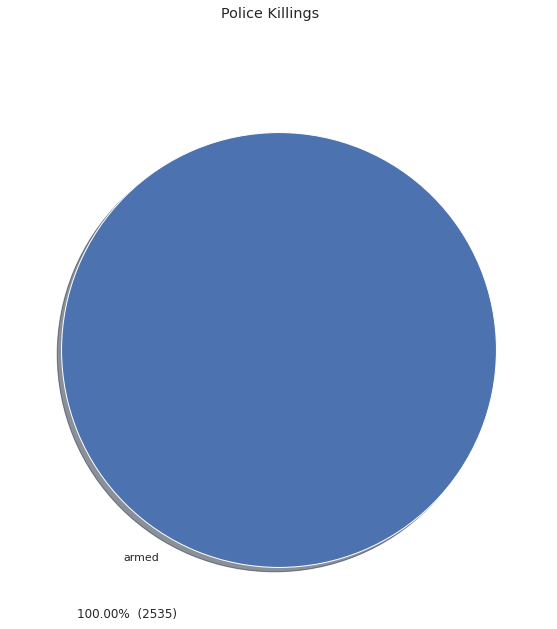

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Police Killings')
plt.pie(percentage, labels=percentage.index, autopct=make_autopct(percentage), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
# plt.legend(loc='best')

plt.show()


In [ ]:
arm = df_fatalities.armed.value_counts()
arm

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: armed, Length: 69, dtype: int64

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).